# HOUSE PRICE PREDICTION

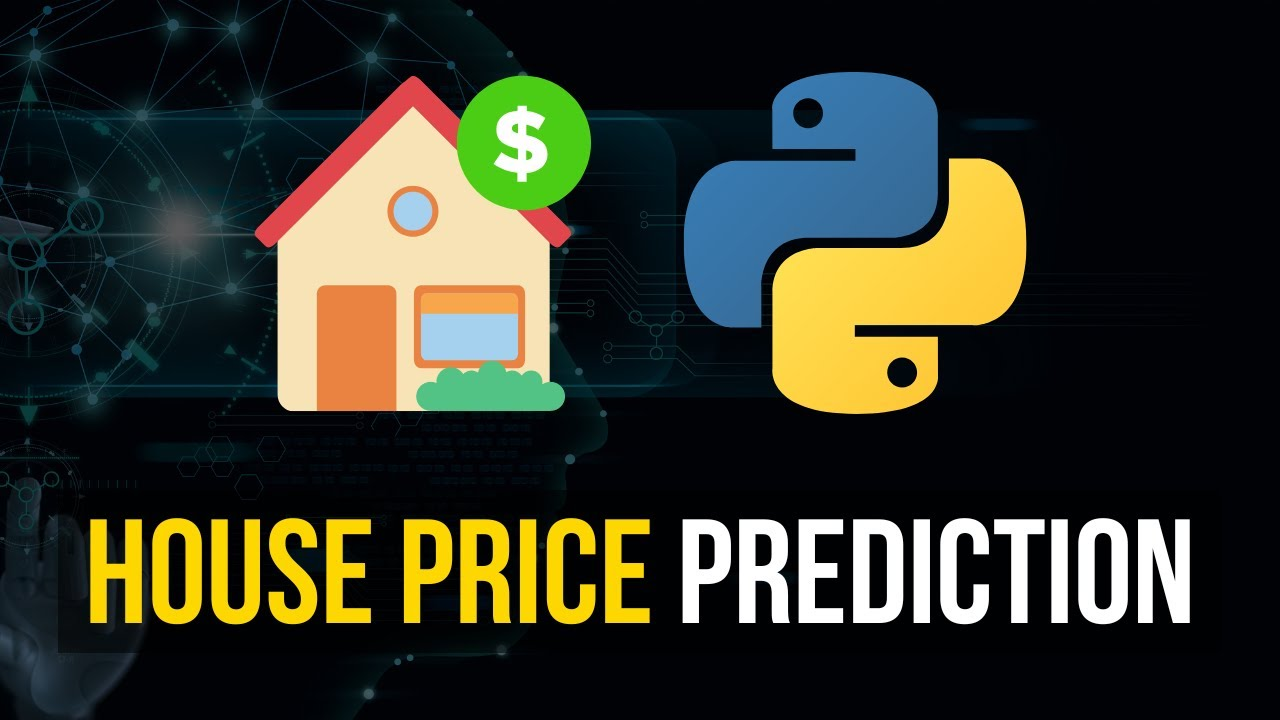

# Importing Libraries and Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
dataset = pd.read_excel("HousePricePrediction.xlsx")
 
# Printing first 5 records of the dataset
print(dataset.head(5))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


As we have imported the data. So shape method will show us the dimension of the dataset. 

In [2]:
dataset.shape

(2919, 13)

# Data Preprocessing

Now, we categorize the features depending on their datatype (int, float, object) and then calculate the number of them. 

In [22]:
# obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 0
Float variables: 3


# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process. It involves understanding and analyzing the dataset to gain insights, identify patterns, and make initial observations. Here's an outline of steps typically involved in performing EDA:

1. Importing Libraries and Dataset: As mentioned earlier, start by importing the necessary libraries such as pandas, NumPy, and matplotlib, and load your dataset into a suitable data structure (e.g., pandas DataFrame).

2. Dataset Overview: Take a high-level look at the dataset to understand its structure and content. Some useful methods include `head()`, `tail()`, `info()`, `describe()`, and `shape`.

3. Handling Missing Values: Check for missing or null values in the dataset and decide how to handle them. You can use methods like `isnull()`, `notnull()`, `dropna()`, or `fillna()` to deal with missing values appropriately.

4. Data Cleaning and Transformation: Clean the data by addressing inconsistencies, incorrect data types, or outliers. Perform necessary data transformations such as converting data types, encoding categorical variables, or scaling numerical features.

5. Univariate Analysis: Analyze individual variables one at a time to understand their distribution, range, and characteristics. Use techniques such as histograms, bar charts, box plots, or summary statistics to gain insights into each variable.

6. Bivariate Analysis: Explore relationships between pairs of variables to identify correlations or associations. Plot scatter plots, correlation matrices, or perform statistical tests to examine the relationships between variables.

7. Multivariate Analysis: Extend the analysis to multiple variables to uncover complex interactions and patterns. Utilize techniques such as heatmaps, pair plots, or advanced statistical methods to examine relationships between multiple variables simultaneously.

8. Feature Engineering: Create new features or derive meaningful information from existing features that may enhance the predictive power of your model. This step involves domain knowledge and creativity.

9. Visualizations: Utilize various visualization techniques to present your findings effectively. Use plots, charts, or graphs to communicate patterns, trends, or insights to stakeholders or audiences.

10. Summarize Key Findings: Summarize the important observations, patterns, and insights obtained from the EDA process. Document your findings and conclusions for future reference or to guide further analysis or modeling tasks.

Remember, EDA is a flexible and iterative process. You can revisit and refine these steps based on the nature of your dataset, research questions, or specific analysis goals.

So here let’s make a heatmap using seaborn library.

C:\Users\91915\AppData\Local\Temp\ipykernel_13572\3487798585.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),


<Axes: >

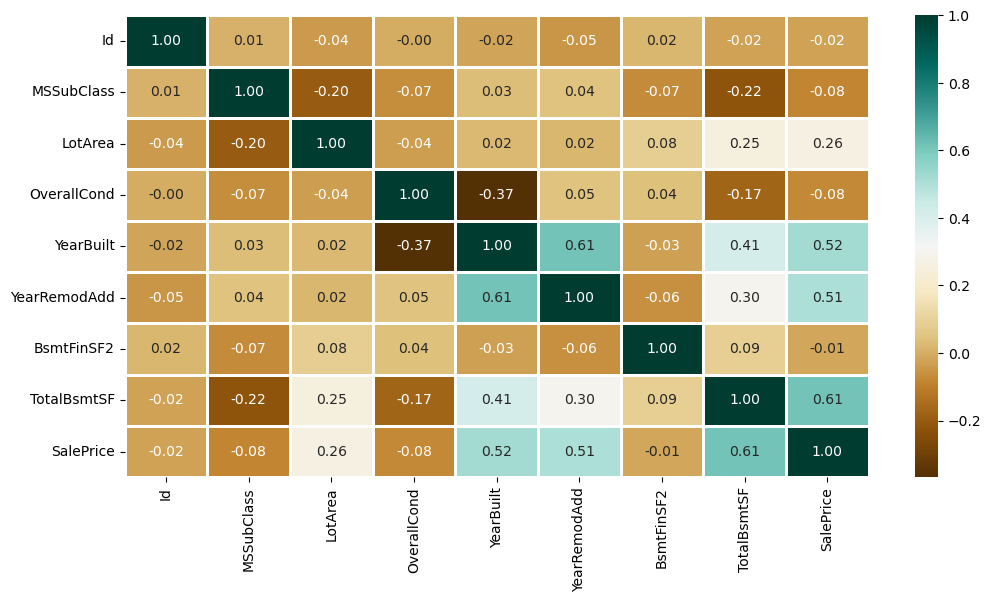

In [4]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

To analyze the different categorical features. Let’s draw the barplot.

<Axes: title={'center': 'No. Unique values of Categorical Features'}>

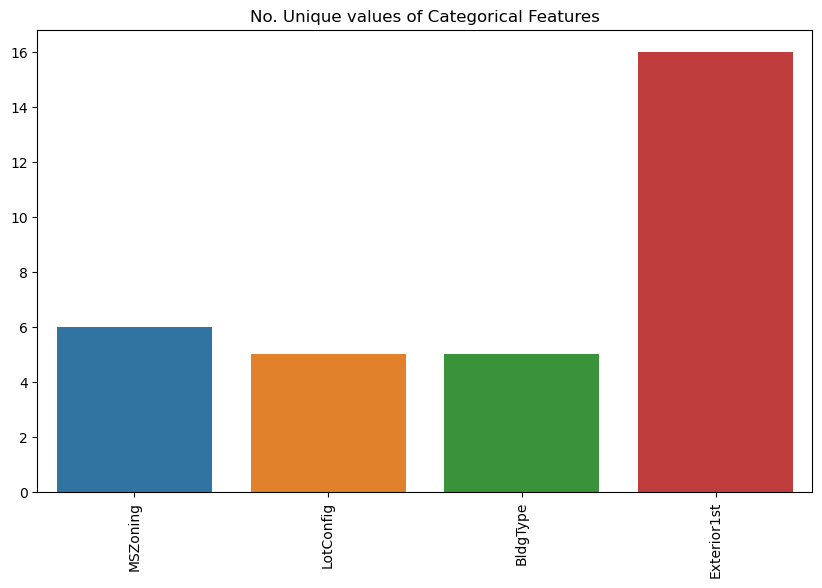

In [5]:
unique_values = []
for col in object_cols:
  unique_values.append(dataset[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)

The plot shows that Exterior1st has around 16 unique categories and other features have around  6 unique categories. To findout the actual count of each category we can plot the bargraph of each four features separately.

C:\Users\91915\AppData\Local\Temp\ipykernel_13572\2166598984.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(11, 4, index)


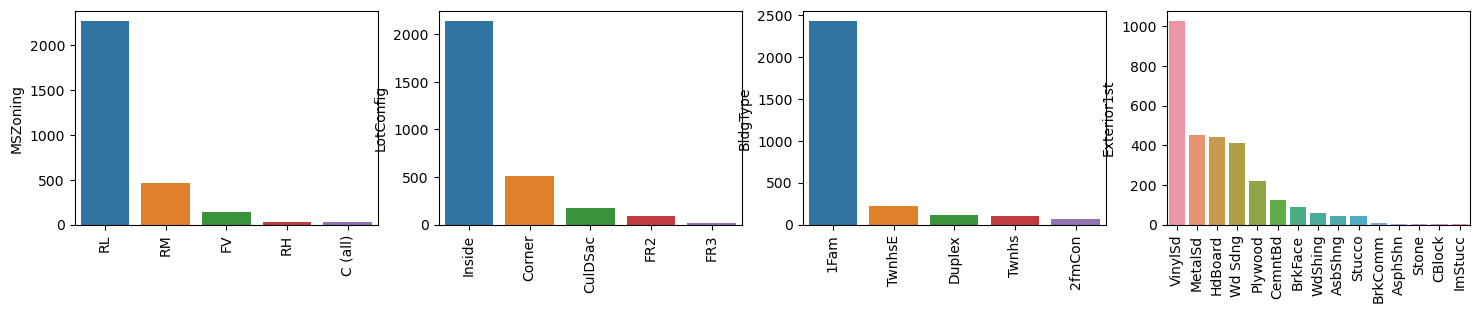

In [6]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1
 
for col in object_cols:
    y = dataset[col].value_counts()
    plt.subplot(11, 4, index)
    plt.xticks(rotation=90)
    sns.barplot(x=list(y.index), y=y)
    index += 1

# Data Cleaning

Data cleaning is an important step in the data preparation process. It involves identifying and addressing issues or errors in the dataset to ensure data quality and reliability. Here are some common tasks involved in data cleaning:

1. Handling Missing Values:
   - Identify missing values in the dataset using methods like `isnull()` or `info()`.
   - Decide how to handle missing values: either by removing rows or columns with missing values (`dropna()`), filling in missing values with appropriate methods (`fillna()`), or using imputation techniques.

2. Dealing with Duplicates:
   - Identify duplicate records in the dataset using methods like `duplicated()`.
   - Decide how to handle duplicates: either by removing them (`drop_duplicates()`) or merging them based on specific criteria.

3. Handling Inconsistent or Incorrect Data:
   - Identify inconsistent or incorrect data by examining data distributions, summary statistics, or domain knowledge.
   - Clean the data by correcting or removing erroneous values.

4. Standardizing Data Formats:
   - Ensure consistent data formats across variables, such as dates, currency, or units of measurement.
   - Convert data types as needed using methods like `astype()` or `to_datetime()`.

5. Managing Outliers:
   - Identify outliers using statistical methods like z-scores, box plots, or domain knowledge.
   - Decide how to handle outliers: either by removing them or applying appropriate transformations.

6. Encoding Categorical Variables:
   - Encode categorical variables into numerical representations suitable for analysis or modeling.
   - Use techniques such as one-hot encoding (`get_dummies()`), label encoding (`LabelEncoder()`), or target encoding.

7. Scaling and Normalization:
   - Scale numerical variables to ensure they have comparable ranges, especially when using algorithms sensitive to the scale of variables.
   - Apply scaling techniques like standardization (`StandardScaler()`) or min-max scaling (`MinMaxScaler()`).

8. Handling Text or String Data:
   - Preprocess and clean text or string data, such as removing special characters, converting to lowercase, or applying stemming/lemmatization.
   - Use techniques like regular expressions (`re` module) or specialized libraries like NLTK or spaCy.

9. Validating Data Integrity:
   - Perform sanity checks to ensure data integrity, such as verifying relationships between variables, cross-referencing data against external sources, or conducting logical checks.

10. Documenting Changes:
    - Keep track of the cleaning steps applied to the data by creating documentation or maintaining an audit trail.
    - Document the rationale behind the cleaning decisions made.

Remember that the specific cleaning tasks and techniques depend on the nature of your dataset, the analysis goals, and the domain knowledge. It's essential to carefully inspect and understand the data before applying any cleaning procedures.

In [7]:
dataset.drop(['Id'],
             axis=1,
             inplace=True)

Replacing SalePrice empty values with their mean values to make the data distribution symmetric.

In [8]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(
  dataset['SalePrice'].mean())

Drop records with null values (as the empty records are very less).

In [9]:
new_dataset = dataset.dropna()

Checking features which have null values in the new dataframe (if there are still any).

In [10]:
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

# OneHotEncoder – For Label categorical features

The OneHotEncoder is a popular technique for encoding categorical features, particularly when using them as inputs for machine learning algorithms. It converts categorical variables into a binary vector representation that can be understood by machine learning models. 

In [11]:
from sklearn.preprocessing import OneHotEncoder
 
s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ',
      len(object_cols))

Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


Then once we have a list of all the features. We can apply OneHotEncoding to the whole list.

In [13]:
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out(input_features=object_cols)
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)


C:\Users\91915\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# Splitting Dataset into Training and Testing

Splitting a dataset into training and testing subsets is an essential step in machine learning to evaluate the performance of a model on unseen data.

X and Y splitting (i.e. Y is the SalePrice column and the rest of the other columns are X)

In [14]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
 
X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']
 
# Split the training set into
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)

# SVM

SVM (Support Vector Machine) is a popular supervised machine learning algorithm used for classification and regression tasks. SVMs are effective in handling both linear and non-linear data by finding an optimal hyperplane or decision boundary that maximizes the margin between different classes.

In [15]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error
 
model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.1870512931870423


# Random Forest Regression

Random Forest Regression is a machine learning algorithm that combines the concepts of decision trees and ensemble learning for regression tasks. It builds multiple decision trees and aggregates their predictions to make more accurate and robust predictions.

In [16]:
from sklearn.ensemble import RandomForestRegressor
 
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)
 
mean_absolute_percentage_error(Y_valid, Y_pred)

0.1890354954726872

# Linear Regression

Linear Regression is a commonly used supervised learning algorithm for predicting a continuous target variable based on one or more input features. It models the relationship between the dependent variable and independent variables as a linear equation.

In [17]:
from sklearn.linear_model import LinearRegression
 
model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)
 
print(mean_absolute_percentage_error(Y_valid, Y_pred))

0.18741683841599951


# Result

SVM model is giving better accuracy as the mean absolute error is the least among all the other regressor models i.e. 0.18 approx.